In [1]:
import pandas as pd

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4084\4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df=pd.read_csv('archive(004)\data.csv')

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4084\3616551863.py:1: SyntaxWarning: invalid escape sequence '\d'
  df=pd.read_csv('archive(004)\data.csv')


In [4]:
df.info()


df

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in df:
    if df[i].dtype=='object':
       df[i]=le.fit_transform(df[i])
    else:
        continue

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
X=df.drop(['diagnosis'],axis=1)
y=df['diagnosis']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y)


In [11]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)


In [12]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from sklearn.naive_bayes import GaussianNB

In [13]:
gnb= GaussianNB()

In [14]:
k= gnb.fit(X_train,y_train)

In [15]:
y_pred =gnb.predict(X_test)

In [16]:
print(y_pred[:25])

[1 0 1 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0]


In [17]:
a=accuracy_score(y_pred,y_test)

In [18]:
print(a)

0.9440559440559441


              precision    recall  f1-score   support

           0       0.96      0.96      0.96        95
           1       0.92      0.92      0.92        48

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143

F1 Score:  0.9166666666666666
[[91  4]
 [ 4 44]]


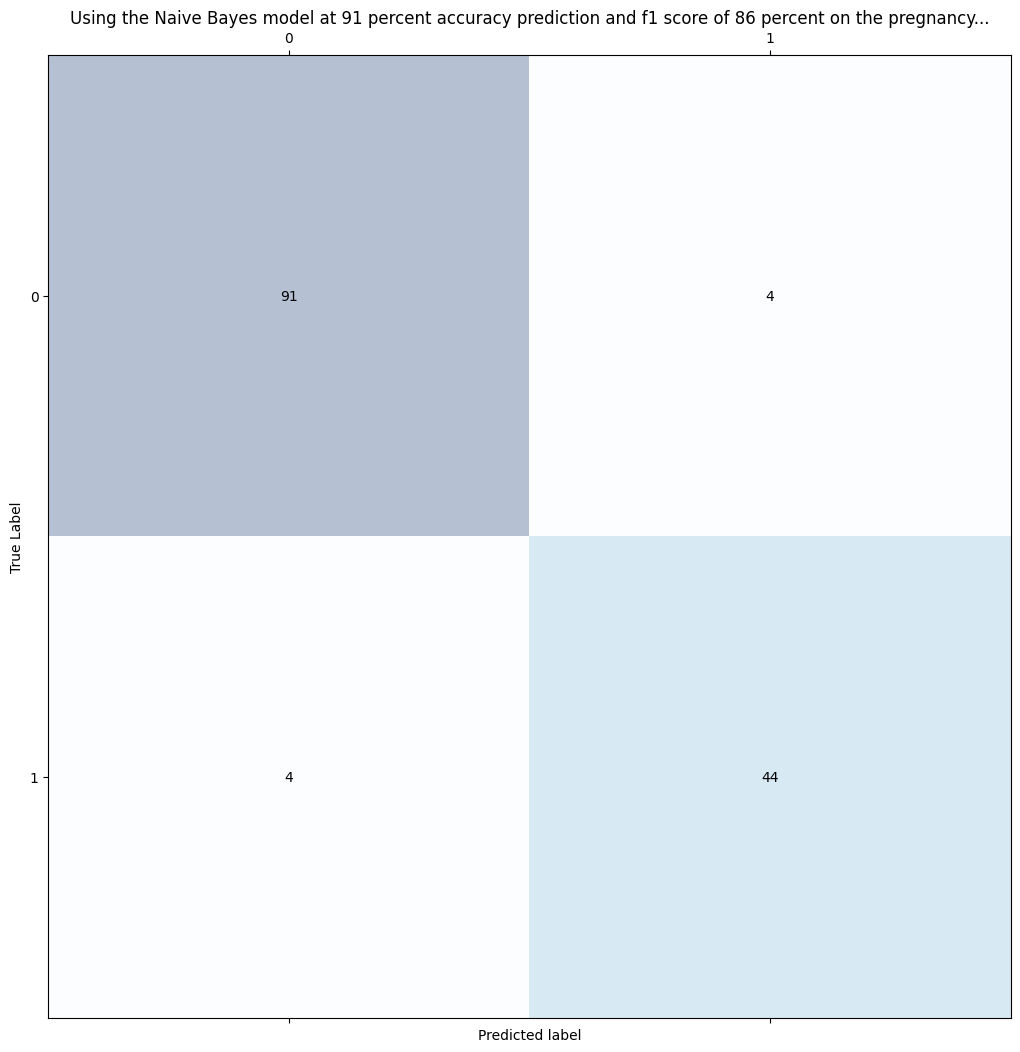

In [19]:
print(classification_report(y_test,y_pred))
print('F1 Score: ',f1_score(y_test,y_pred,zero_division=1))
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
confmat=confusion_matrix(y_true=y_test,y_pred=y_pred)

print(confmat)

fig, ax=plt.subplots(figsize=(12.5,12.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.30)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i,
                s=confmat[i, j],
                va='center', ha='center')
        plt.title('Using the Naive Bayes model at 91 percent accuracy prediction and f1 score of 86 percent on the pregnancy...')
        plt.xlabel('Predicted label')
        plt.ylabel('True Label')
        
        

In [21]:
print(gnb.get_params().keys())

dict_keys(['priors', 'var_smoothing'])


In [22]:
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.model_selection import RepeatedStratifiedKFold
param_grid ={
        "var_smoothing":np.logspace(0,-9, num=100)
}
grid_search=GridSearchCV(gnb, param_grid, scoring='roc_auc', cv=10, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.848035...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='roc_auc')

In [23]:
grid_scores = grid_search.cv_results_

In [24]:
print(grid_scores)

{'mean_fit_time': array([0.0038141 , 0.0033886 , 0.00301192, 0.00125611, 0.00129483,
       0.00142999, 0.00233212, 0.00014105, 0.00245457, 0.00054283,
       0.0026258 , 0.00205586, 0.00140002, 0.00294564, 0.00151613,
       0.00315971, 0.0022197 , 0.00210471, 0.0027281 , 0.00197792,
       0.00217416, 0.00291882, 0.00259569, 0.00355372, 0.00278459,
       0.00189276, 0.00167301, 0.00116513, 0.00181673, 0.00259204,
       0.00160136, 0.00359988, 0.00173519, 0.002687  , 0.00203958,
       0.00362606, 0.00170276, 0.00041544, 0.00094988, 0.00135272,
       0.00385745, 0.00109348, 0.00219886, 0.00320132, 0.00239267,
       0.00188835, 0.00311904, 0.00300441, 0.00218804, 0.0026792 ,
       0.00090482, 0.00210733, 0.00089099, 0.00312352, 0.00204074,
       0.00229445, 0.00233142, 0.00204768, 0.00228791, 0.00358169,
       0.00336261, 0.00135527, 0.00154045, 0.00181549, 0.00145695,
       0.00147054, 0.00314751, 0.00168734, 0.00073714, 0.0039202 ,
       0.00087607, 0.00248036, 0.00119007, 0

In [25]:
pd.DataFrame(grid_scores)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_var_smoothing,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003814,0.002685,0.007085,0.004828,1.0,{'var_smoothing': 1.0},0.990741,0.990741,0.957014,0.975113,0.993213,0.968326,0.975962,0.9375,1.0,0.985577,0.977419,0.018113,98
1,0.003389,0.004110,0.002564,0.002823,0.811131,{'var_smoothing': 0.8111308307896871},0.990741,0.990741,0.957014,0.975113,0.993213,0.972851,0.975962,0.9375,1.0,0.985577,0.977871,0.017936,96
2,0.003012,0.002759,0.003304,0.002398,0.657933,{'var_smoothing': 0.657933224657568},0.990741,0.988426,0.957014,0.975113,0.993213,0.972851,0.978365,0.9375,1.0,0.985577,0.977880,0.017775,95
3,0.001256,0.001641,0.002358,0.003042,0.53367,{'var_smoothing': 0.533669923120631},0.990741,0.988426,0.954751,0.975113,0.993213,0.972851,0.978365,0.9375,1.0,0.985577,0.977654,0.018051,97
4,0.001295,0.002427,0.001575,0.002950,0.432876,{'var_smoothing': 0.43287612810830584},0.990741,0.986111,0.954751,0.972851,0.993213,0.972851,0.978365,0.9375,1.0,0.985577,0.977196,0.017968,99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.001310,0.001953,0.000806,0.001529,0.0,{'var_smoothing': 2.310129700083158e-09},0.990741,0.986111,0.959276,0.975113,0.995475,0.963801,0.992788,0.9375,1.0,0.990385,0.979119,0.018915,1
96,0.002471,0.003036,0.002330,0.003131,0.0,{'var_smoothing': 1.873817422860387e-09},0.990741,0.986111,0.959276,0.975113,0.995475,0.963801,0.992788,0.9375,1.0,0.990385,0.979119,0.018915,1
97,0.001415,0.002073,0.001625,0.002406,0.0,{'var_smoothing': 1.519911082952933e-09},0.990741,0.986111,0.959276,0.975113,0.995475,0.963801,0.992788,0.9375,1.0,0.990385,0.979119,0.018915,1
98,0.001303,0.002054,0.002605,0.002672,0.0,{'var_smoothing': 1.2328467394420635e-09},0.990741,0.986111,0.959276,0.975113,0.995475,0.963801,0.992788,0.9375,1.0,0.990385,0.979119,0.018915,1
